In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()
X = wine.data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

In [6]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

In [7]:
kmeans_score = silhouette_score(X_pca, kmeans_labels)
gmm_score = silhouette_score(X_pca, gmm_labels)

print("Silhouette Score (K-Means):", round(kmeans_score, 3))
print("Silhouette Score (EM/GMM):", round(gmm_score, 3))

Silhouette Score (K-Means): 0.56
Silhouette Score (EM/GMM): 0.559


Text(0, 0.5, 'Principal Component 2')

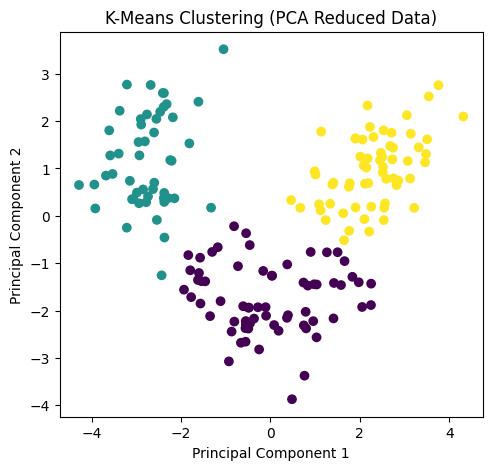

In [8]:
plt.figure(figsize=(12, 5))

# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title("K-Means Clustering (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

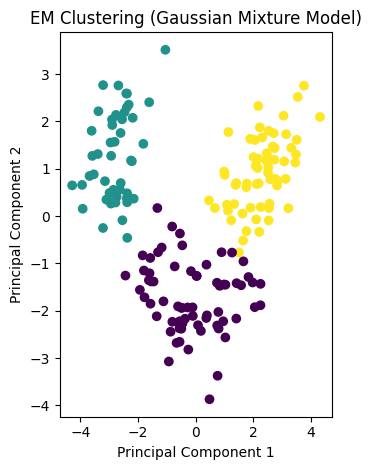

In [9]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels)
plt.title("EM Clustering (Gaussian Mixture Model)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

